<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/LOG/Multi_LR_MOD_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import numpy as np
import pandas as pd
import sklearn.datasets  # to import iris
import matplotlib.pyplot as plt  # %matplotlib inline # this line şs for jupyter notebooks



In [2]:

#load data as numpy array using genfromtxt
train_data = pd.read_csv('https://drive.google.com/uc?id=1vJwVLSGvbSK1kE8n2RNifUxCVMWu6PmY', delimiter=',')
train_data.head()
rows = train_data.shape[0]
cols = train_data.shape[1]
scores = train_data[['x1', 'x2']].values
results = train_data['y'].values
mean_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)
scores = (scores - mean_scores) / std_scores
X = np.append(np.ones((rows, 1)), scores, axis=1) #include intercept
y = results.reshape(rows, 1)
print(X.shape)
print(y.shape)
m_train=X.shape[0]
print(m_train)

(100, 3)
(100, 1)
100


In [3]:
train_data.head()

,x1,x2,y
0,22.63,61.39,0
1,99.38,27.28,1
2,94.32,66.42,2
3,23.43,40.44,0
4,98.36,8.14,1


In [4]:
#load test data as numpy array using genfromtxt
test_data = pd.read_csv('https://drive.google.com/uc?id=1j4euqcEGkQfVZEzNOA0_3qblEI9vx6Hp')
#no of test samples
rows_test = test_data.shape[0]
cols_test = test_data.shape[1]
scores_test = test_data[['x1', 'x2']].values
results_test = test_data['y'].values
mean_scores_test = np.mean(scores_test, axis=0)
std_scores_test = np.std(scores_test, axis=0)
scores_test = (scores_test - mean_scores_test) / std_scores_test
test_X = np.append(np.ones((rows_test, 1)), scores_test, axis=1) #include intercept
test_y = results_test.reshape(rows_test, 1)
test_m =test_X.shape[0]

print(test_X.shape)
print(test_y.shape)
print(test_m)


(10, 3)
(10, 1)
10


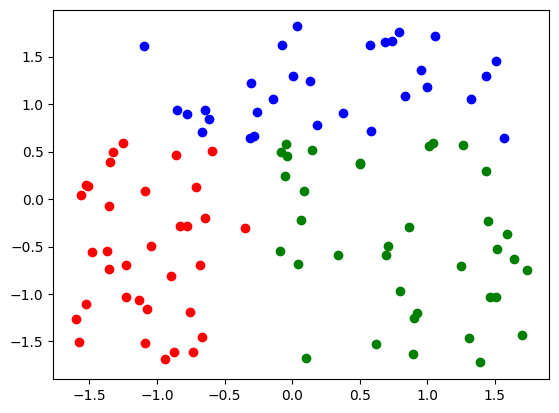

In [5]:

colors = ['r', 'g', 'b']
for c in np.unique(y):
    plt.plot(scores[results== c, 0], scores[results == c, 1], 'o', color=colors[int(c)])
# also print our test datapoint



In [6]:
y=y.flatten()
print(y)

[0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0
 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1
 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 0 1 0 1 0 1 1 1]


In [7]:
 # model for class 0
y_0 = np.copy(y)
y_0[y == 2] = 1.0 # Fixed: flatten y for consistent indexing
y_0 = y_0 - 1.0
y_0 = abs(y_0 * -1.0)

In [8]:
print(y_0)

[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 0. 0.]


In [9]:
# model for class 1
y_1 = np.copy(y)
y_1[y == 2] = 1
y_1[y == 2] = 0

In [10]:
print(y_1)

[0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0
 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1
 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1]


In [11]:
# model for class 2
y_2 = np.copy(y)
y_2[y == 1] = 0
y_2[y  == 2] = 1


In [12]:
print(y_2)

[0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0
 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]


In [13]:
def sigmoid(x):
    return 1/ (1 + np.exp(-x))


In [14]:
def hypotesis(x,theta):
    z = np.dot(x, theta)
    h = sigmoid(z)
    return h

In [15]:

# define cost function
# J(theta) = 1/m (-y^T log(h) - (1-y)^T log(1-h) )
def cost(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)) / y.size

In [16]:
def gradiente(x,y,theta,alfa,iteraciones,epsilon):
  import  math
  m=len(y)
  J_vals = []
  prev = math.inf
  for i in range(iteraciones):
      h = hypotesis(X, theta)
      cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
      J_vals.append(cost)
      if(abs( J_vals[i]- prev) < epsilon) :
             print("Convergencia Alcanzada !", i ," iteraciones")
             break
      prev = J_vals[i]
      gradient = np.dot(X.T, (h - y)) / m
      theta -= alpha * gradient
    #if i % 20000 == 0:
    #   print('iteracion ',i,'coste ', cost)
  print('Adjusted coefficient: {}'.format(theta))
  print("cost: {}".format(J_vals[i]))
  return theta, J_vals

In [17]:

y_0_reshaped = y_0.reshape(-1, 1)
y_1_reshaped = y_1.reshape(-1, 1)
y_2_reshaped = y_2.reshape(-1, 1)

In [19]:
# logistic regression parameters
num_iter = 2500000
alpha = 0.0001
epsilon = 1e-8

In [20]:
theta = np.zeros((cols , 1))
theta_0, costs0 = gradiente(X, y_0_reshaped, theta, alpha, num_iter, epsilon)
theta = np.zeros((cols , 1))
theta_1, costs1 = gradiente(X, y_1_reshaped, theta, alpha, num_iter, epsilon)
theta = np.zeros((cols , 1))
theta_2, costs2 = gradiente(X, y_2_reshaped, theta, alpha, num_iter, epsilon)

Convergencia Alcanzada ! 1868429  iteraciones
Adjusted coefficient: [[-2.68506125]
 [-5.02092661]
 [-2.17010226]]
cost: 0.08285337122439042
Convergencia Alcanzada ! 564208  iteraciones
Adjusted coefficient: [[-0.87724755]
 [ 2.3591015 ]
 [-1.58413296]]
cost: 0.30407358502962195
Adjusted coefficient: [[-3.9097288]
 [ 0.1110004]
 [ 6.0495895]]
cost: 0.1051047318016941


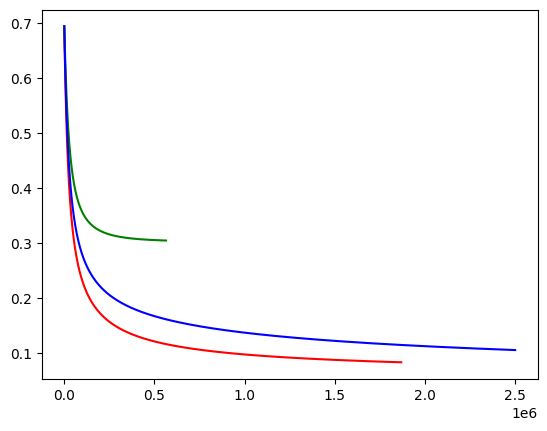

In [21]:
plt.plot(costs0,label='class 0', c='r')
plt.plot(costs1,label='class 1', c='g')
plt.plot(costs2,label='class 2', c='b')
plt.show()

In [22]:
#predict
pred = np.zeros((test_m,1))
model_predict = hypotesis(test_X, theta_0)
pred[model_predict > 0.5] = 1
print(pred.flatten())
print(test_y.flatten())

[1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0 0 1 2 1 2 2 1 0 2]


##Plot the decision boundary line  
only need 2 points to define the line lets take min and max of feature 1 and calculate feature 2 based on the theta values we have

y = theta0 + theta1x1 + theta2x2, since y is 3rd dimension take y as 0 and calculate x2 to plot the decision boundary line





In [23]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, explained_variance_score

#train the model with training data
regr = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear') # Added solver for ovr
regr.fit(X,y.reshape(m_train))


#Predict our test data
sklearn_predict = regr.predict(test_X)

print('Sklearn')
#coefficients
print('Coefficients: {}'.format(regr.coef_))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(sklearn_predict, test_y))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % explained_variance_score(test_y, sklearn_predict))

print('\n')

Sklearn
Coefficients: [[-0.8300931  -3.01146537 -1.3343593 ]
 [-0.40603379  2.02917706 -1.34509   ]
 [-1.03583473  0.20022073  3.17170299]]
Mean squared error: 0.00
Variance score: 1.00




/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [24]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

# generate evaluation metrics
print ("Accuracy :", metrics.accuracy_score(test_y, regr.predict(test_X)))
print ("AUC :", roc_auc_score(test_y, regr.predict_proba(test_X), multi_class='ovr'))

print ("Confusion matrix\n :",metrics.confusion_matrix(test_y, regr.predict(test_X)))
print ("classification report :", metrics.classification_report(test_y, regr.predict(test_X)))

Accuracy : 1.0
AUC : 1.0
Confusion matrix
 : [[3 0 0]
 [0 3 0]
 [0 0 4]]
classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

